# Fetch the data

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score

In [3]:
test_file_paths = [
    '/Users/shivakumarbiru/Desktop/individual_project/rfc/dataset/test_data/adc_anil_halfsleeves_normal_move.csv',
    '/Users/shivakumarbiru/Desktop/individual_project/rfc/dataset/test_data/adc_anil_halfsleeves_low seat.csv',
    '/Users/shivakumarbiru/Desktop/individual_project/rfc/dataset/test_data/adc_anil_halfsleeves_sidewise_const.csv',
    '/Users/shivakumarbiru/Desktop/individual_project/rfc/dataset/test_data/adc_anil_halfsleeves_normal_const.csv',
     '/Users/shivakumarbiru/Desktop/individual_project/rfc/dataset/test_data/adc_anil_halfsleeves_enter.csv',
     '/Users/shivakumarbiru/Desktop/individual_project/rfc/dataset/test_data/adc_anil_halfsleeves_exit.csv',
     '/Users/shivakumarbiru/Desktop/individual_project/rfc/dataset/test_data/adc_anil_halfsleeves_leanedbackward.csv',
     '/Users/shivakumarbiru/Desktop/individual_project/rfc/dataset/test_data/adc_anil_halfsleeves_normal_const.csv'

]



In [4]:
dfs = []

# Loop through the file paths and append each DataFrame to the list
for file in test_file_paths:
    df = pd.read_csv(file, header=None, index_col=False)
    df["label"]=1
    dfs.append(df)

# Concatenate all the DataFrames in the list
combined_person_df = pd.concat(dfs, ignore_index=True)
combined_person_df

,0,1,2,3,4,5,6,7,8,9,...,16391,16392,16393,16394,16395,16396,16397,16398,16399,label
0,64,32768,1,1,512,0,1953125,12,0.0,3330,...,3,5,1,-3,-5,-4,-6,-8,-10,1
1,64,32768,1,1,512,0,1953125,12,0.0,3124,...,-24,-23,-22,-21,-19,-14,-9,-5,-4,1
2,64,32768,1,1,512,0,1953125,12,0.0,7833,...,-5,-5,-8,-8,-5,-5,-6,-10,-14,1
3,64,32768,1,1,512,0,1953125,12,0.0,7822,...,6,-44,-90,-119,-222,-322,-382,-381,-380,1
4,64,32768,1,1,512,0,1953125,12,0.0,3162,...,28,30,28,31,33,28,22,23,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6195,64,32768,1,1,512,0,1953125,12,0.0,11041,...,5,8,7,0,-3,-5,-2,0,-5,1
6196,64,32768,1,1,512,0,1953125,12,0.0,11046,...,2,3,0,1,-1,-1,-3,-1,-1,1
6197,64,32768,1,1,512,0,1953125,12,0.0,11216,...,0,0,1,3,2,0,-2,-4,-5,1
6198,64,32768,1,1,512,0,1953125,12,0.0,7693,...,-7,-10,-4,-4,-3,-1,-2,-2,-2,1


In [5]:
# Get the shape of the DataFrame
shape = combined_person_df.shape

# Number of rows
num_rows = shape[0]

# Number of columns
num_columns = shape[1]

# Print the number of rows and columns
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 6200
Number of columns: 16401


In [6]:
# Select from the 17th column to the end
adc_data_selected_columns_for_person = combined_person_df.iloc[:, 16:]  # Python uses 0-based indexing
adc_data_selected_columns_for_person.head()

,16,17,18,19,20,21,22,23,24,25,...,16391,16392,16393,16394,16395,16396,16397,16398,16399,label
0,-10,-9,-7,-7,-6,4,0,-6,-5,-1,...,3,5,1,-3,-5,-4,-6,-8,-10,1
1,-3,-3,-2,-1,3,-7,-6,-5,-2,-6,...,-24,-23,-22,-21,-19,-14,-9,-5,-4,1
2,-13,-10,-9,-68,-55,-48,-31,-13,4,29,...,-5,-5,-8,-8,-5,-5,-6,-10,-14,1
3,-391,-392,-396,-5,-4,-1,3,-1,-1,3,...,6,-44,-90,-119,-222,-322,-382,-381,-380,1
4,23,24,26,30,-54,-59,-60,-66,-68,-69,...,28,30,28,31,33,28,22,23,23,1


In [7]:
test_features_df = adc_data_selected_columns_for_person.drop(columns='label')  # Drop the 'label' column to get features
test_labels_df = adc_data_selected_columns_for_person['label']  # Extract the 'label' column to get labels

# Convert the ADC Data to FFT

filtered column are [30.038907537381753, 30.15810955141898, 30.27731156545621, 30.39651357949344, 30.51571559353067, 30.6349176075679, 30.754119621605128, 30.87332163564236, 30.992523649679583, 31.111725663716815, 31.230927677754043, 31.350129691791274, 31.469331705828502, 31.588533719865733, 31.70773573390296, 31.82693774794019, 31.946139761977417, 32.06534177601465, 32.184543790051876, 32.303745804089104, 32.42294781812634, 32.54214983216357, 32.661351846200795, 32.78055386023802, 32.89975587427525, 33.018957888312485, 33.13815990234971, 33.257361916386934, 33.37656393042417, 33.4957659444614, 33.61496795849863, 33.73416997253585, 33.85337198657309, 33.972574000610315, 34.09177601464754, 34.21097802868478, 34.330180042722, 34.449382056759234, 34.56858407079646, 34.6877860848337, 34.80698809887092, 34.926190112908145, 35.04539212694538, 35.16459414098261, 35.283796155019836, 35.402998169057064, 35.5222001830943, 35.64140219713153, 35.76060421116875, 35.87980622520598, 35.9990082392432

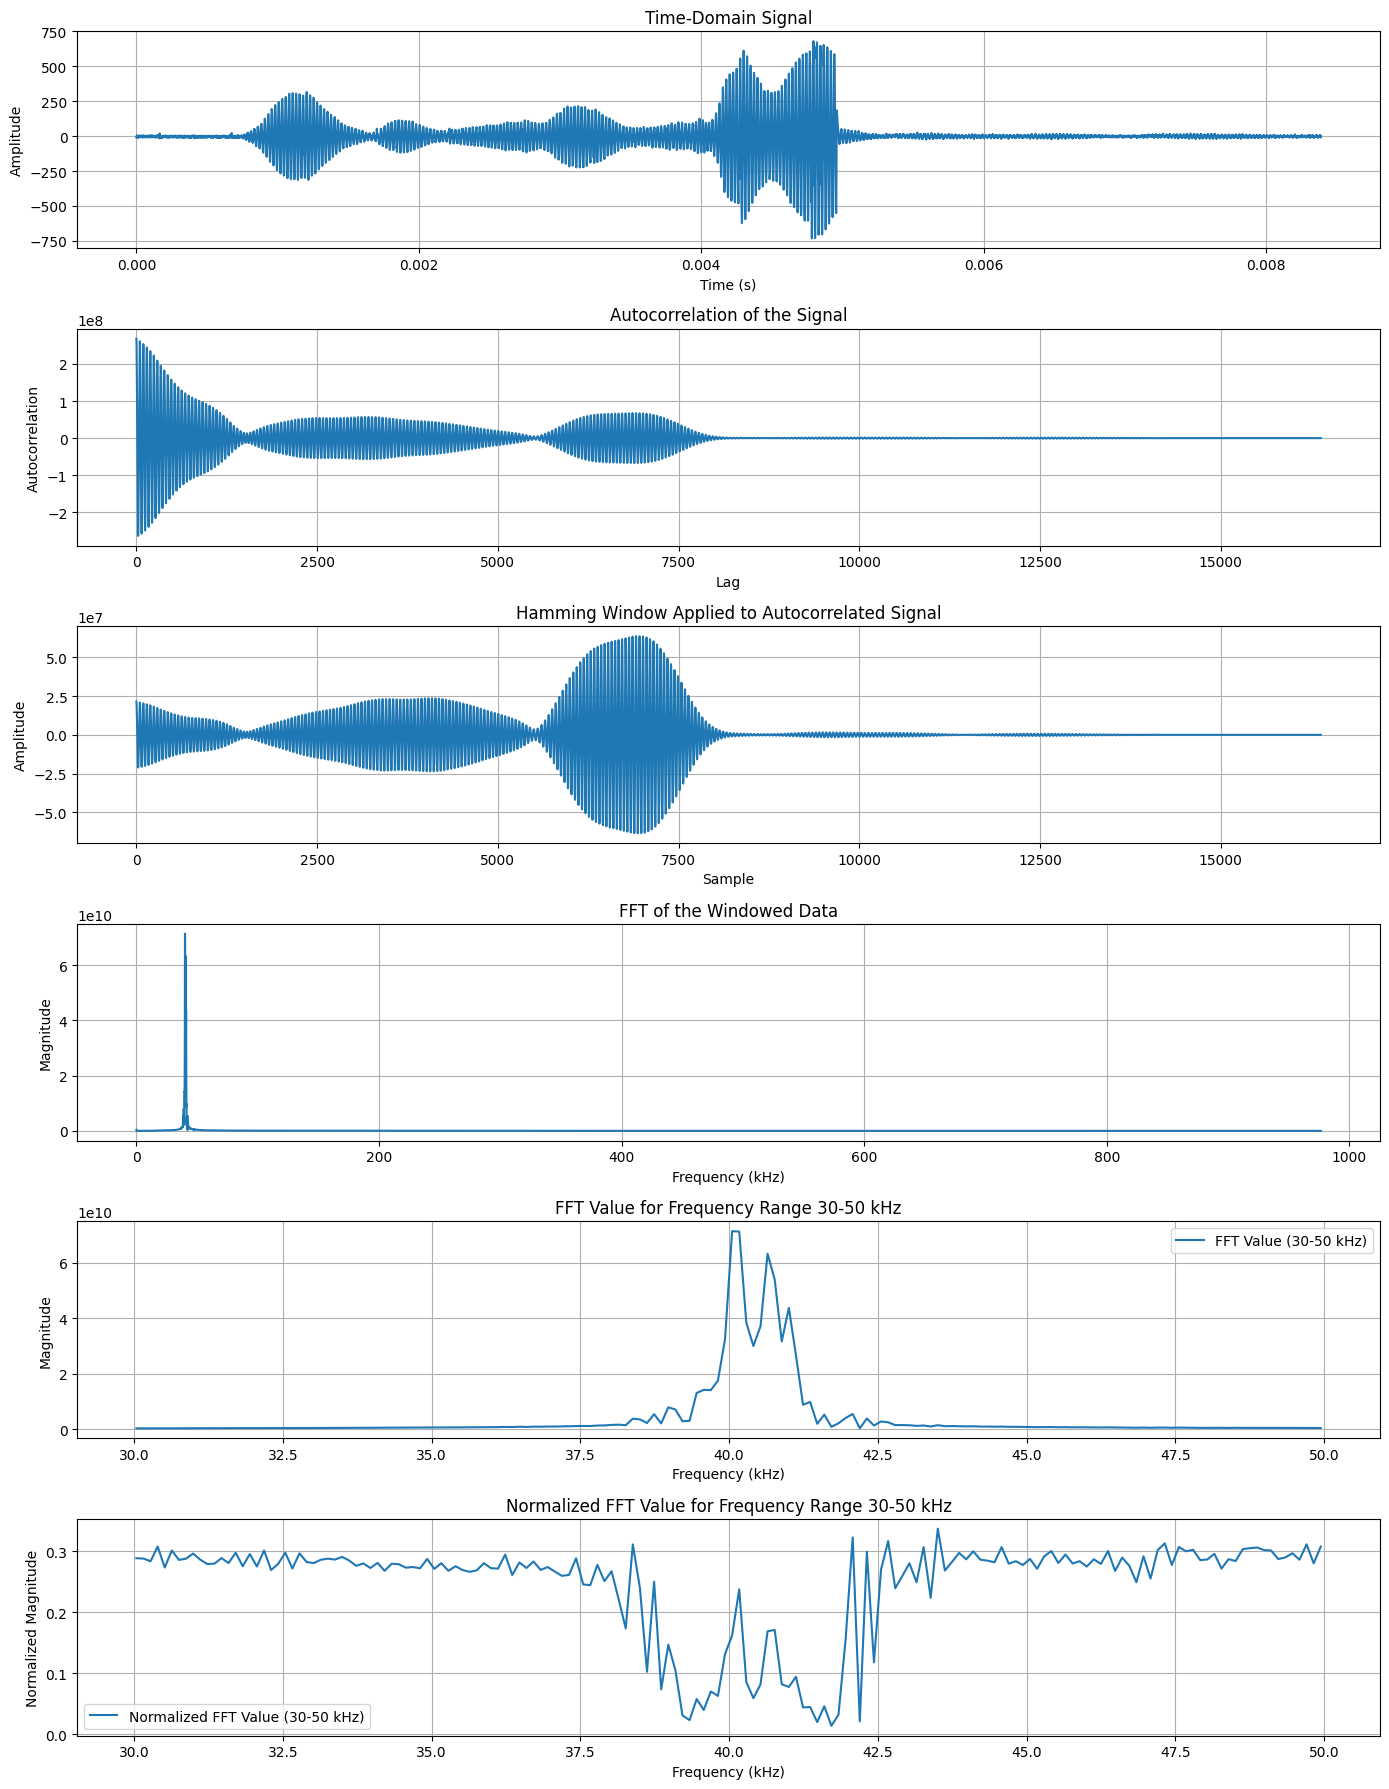

In [8]:
# # Assuming `adc_data_selected_columns` is your DataFrame
# adc_array = adc_data_selected_columns_for_person.to_numpy()

# # Define the sampling frequency
# sampling_rate = 1953125  # Use the actual sampling rate

# # Initialize lists to store the results
# fft_values_list = []
# frequency_list = []

# # Perform FFT for each row
# for row in range(adc_array.shape[0]):
#     # Compute the FFT
#     fft_result = np.fft.fft(adc_array[row, :])
    
#     # Frequency bins
#     freq = np.fft.fftfreq(len(fft_result), d=1/sampling_rate)
    
#     # Extract positive frequencies and corresponding FFT values
#     positive_freqs = freq[:len(freq) // 2] / 1000  # Convert to kHz
#     positive_fft_values = np.abs(fft_result[:len(freq) // 2])
    
#     # Append the results to the lists
#     if row == 0:
#         frequency_list = positive_freqs  # Store frequency values only once
#     fft_values_list.append(positive_fft_values)

# # Convert lists to numpy arrays
# fft_values = np.array(fft_values_list)

# # Create a DataFrame
# fft_df = pd.DataFrame(fft_values, columns=frequency_list)

# # Define the specific frequency range in kHz
# range_min, range_max = 30, 50

# # Filter data for the specified range
# filtered_columns = [col for col in fft_df.columns if range_min <= col <= range_max]
# print("filtered column are", filtered_columns)
# filtered_data = fft_df[filtered_columns]
# print(filtered_data)
# # Plot the results
# plt.figure(figsize=(14, 14))

# # Plot the time-domain signal
# plt.subplot(4, 1, 1)
# plt.plot(np.arange(adc_array.shape[1]) / sampling_rate, adc_array[0, :])  # Plotting the first row as an example
# plt.title('Time-Domain Signal')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')
# plt.grid(True)

# # Plot the FFT of the time-domain signal (both positive and negative frequencies)
# plt.subplot(4, 1, 2)
# plt.plot(np.fft.fftfreq(len(adc_array[0, :]), d=1/sampling_rate), np.abs(np.fft.fft(adc_array[0, :])))
# plt.title('FFT of Time-Domain Signal')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Magnitude')
# plt.grid(True)

# # Plot the positive part of the FFT
# plt.subplot(4, 1, 3)
# plt.plot(frequency_list, fft_df.iloc[0, :])
# plt.title('Positive Part (Magnitude) of FFT')
# plt.xlabel('Frequency (kHz)')
# plt.ylabel('Magnitude')
# plt.grid(True)

# # Plot the FFT values in the 30-50 kHz range
# plt.subplot(4, 1, 4)
# plt.plot(filtered_data.columns, filtered_data.iloc[0, :], label='FFT Value')  # Plotting the first row's FFT values
# plt.title('FFT Value for Frequency Range 30-50 kHz')
# plt.xlabel('Frequency (kHz)')
# plt.ylabel('Magnitude')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

adc_array = adc_data_selected_columns_for_person.to_numpy()

# Define the sampling frequency
sampling_rate = 1953125  # Use the actual sampling rate

# Autocorrelation function
def autocorrelation(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:]

# Apply Hamming window function
def apply_hamming_window(data):
    window = np.hamming(len(data))
    return data * window

# Initialize lists to store the results
fft_values_list = []
frequency_list = []

# Perform processing for each row
for row in adc_array:
    # Step 1: Compute the autocorrelation
    autocorr_result = autocorrelation(row)
    
    # Step 2: Apply the Hamming window
    windowed_data = apply_hamming_window(autocorr_result)
    
    # Step 3: Compute the FFT
    fft_result = np.fft.fft(windowed_data)
    
    # Frequency bins
    freq = np.fft.fftfreq(len(fft_result), d=1/sampling_rate)
    
    # Extract positive frequencies and corresponding FFT values
    positive_freqs = freq[:len(freq) // 2] / 1000  # Convert to kHz
    positive_fft_values = np.abs(fft_result[:len(freq) // 2])
    
    # Append the results to the lists
    if len(frequency_list) == 0:
        frequency_list = positive_freqs  # Store frequency values only once
    fft_values_list.append(positive_fft_values)

# Convert lists to numpy arrays
fft_values = np.array(fft_values_list)

# Create a DataFrame
fft_df = pd.DataFrame(fft_values, columns=frequency_list)

# Define the specific frequency range in kHz
range_min, range_max = 30, 50

# Filter data for the specified range
filtered_columns = [col for col in fft_df.columns if range_min <= col <= range_max]
filtered_data = fft_df[filtered_columns]


# Normalize the filtered data
normalized_data = (filtered_data - filtered_data.min()) / (filtered_data.max() - filtered_data.min())

print("filtered column are", filtered_columns)
filtered_normalized_data = fft_df[filtered_columns]
print(filtered_normalized_data)

# Plot the results
plt.figure(figsize=(14, 18))

# Plot the time-domain signal
plt.subplot(6, 1, 1)
plt.plot(np.arange(adc_array.shape[1]) / sampling_rate, adc_array[0, :])  # Plotting the first row as an example
plt.title('Time-Domain Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot the autocorrelation of the time-domain signal
plt.subplot(6, 1, 2)
plt.plot(autocorrelation(adc_array[0, :]))
plt.title('Autocorrelation of the Signal')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)

# Plot the Hamming window applied to the autocorrelated signal
plt.subplot(6, 1, 3)
plt.plot(apply_hamming_window(autocorrelation(adc_array[0, :])))
plt.title('Hamming Window Applied to Autocorrelated Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot the FFT of the windowed data
plt.subplot(6, 1, 4)
plt.plot(frequency_list, fft_df.iloc[0, :])
plt.title('FFT of the Windowed Data')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Magnitude')
plt.grid(True)

# Plot the FFT values in the 30-50 kHz range
plt.subplot(6, 1, 5)
plt.plot(filtered_data.columns, filtered_data.iloc[0, :], label='FFT Value (30-50 kHz)')
plt.title('FFT Value for Frequency Range 30-50 kHz')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)

# Plot the normalized FFT values in the 30-50 kHz range
plt.subplot(6, 1, 6)
plt.plot(normalized_data.columns, normalized_data.iloc[0, :], label='Normalized FFT Value (30-50 kHz)')
plt.title('Normalized FFT Value for Frequency Range 30-50 kHz')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Normalized Magnitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()





In [9]:

normalized_data.head()

,30.038908,30.158110,30.277312,30.396514,30.515716,30.634918,30.754120,30.873322,30.992524,31.111726,...,48.872826,48.992028,49.111230,49.230432,49.349634,49.468836,49.588038,49.707240,49.826442,49.945644
0,0.288359,0.287789,0.283285,0.307513,0.273158,0.301117,0.285619,0.287625,0.296012,0.286087,...,0.305968,0.301693,0.300955,0.286942,0.289601,0.296508,0.285970,0.311033,0.279978,0.307508
1,0.249174,0.245262,0.251178,0.251852,0.252058,0.243846,0.256747,0.246558,0.250363,0.251171,...,0.236227,0.216597,0.268940,0.220995,0.256209,0.240271,0.243470,0.248457,0.230833,0.242230
2,0.382314,0.353843,0.366658,0.363511,0.362545,0.372679,0.364820,0.364417,0.374461,0.379631,...,0.357988,0.379308,0.405591,0.349361,0.397860,0.393169,0.376698,0.395160,0.387021,0.330980
3,0.399286,0.390405,0.388118,0.418492,0.393591,0.404225,0.395598,0.386315,0.405455,0.396078,...,0.339606,0.440801,0.394157,0.403995,0.388975,0.412506,0.385533,0.421836,0.382090,0.402063
4,0.016345,0.017072,0.015661,0.016628,0.015145,0.015574,0.015063,0.014264,0.014612,0.014223,...,0.009232,0.008784,0.009660,0.008874,0.009959,0.008604,0.010058,0.009814,0.009579,0.009291


In [10]:
model_rfc = joblib.load('/Users/shivakumarbiru/Desktop/individual_project/rfc/models/rf_classifier')

In [11]:
y_pred = model_rfc.predict(normalized_data)
precision = precision_score(test_labels_df, y_pred)
recall = recall_score(test_labels_df, y_pred)
f1 = f1_score(test_labels_df, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

    # Calculate accuracy
accuracy = accuracy_score(test_labels_df, y_pred)
print("Accuracy:", accuracy)

Precision: 1.0
Recall: 0.5098387096774194
F1-score: 0.6753551970943276
Accuracy: 0.5098387096774194


In [16]:
loaded_model = joblib.load('/Users/shivakumarbiru/Desktop/individual_project/rfc/models/svm1_model')

# Step 8: Make predictions using the loaded model
y_pred_loaded = loaded_model.predict(normalized_data)

# Step 9: Calculate and print metrics
accuracy = accuracy_score(test_labels_df, y_pred_loaded)
precision = precision_score(test_labels_df, y_pred_loaded)
recall = recall_score(test_labels_df, y_pred_loaded)
f1 = f1_score(test_labels_df, y_pred_loaded)
conf_matrix = confusion_matrix(test_labels_df, y_pred_loaded)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[6200]]


/Users/shivakumarbiru/Desktop/individual_project/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [32]:

import joblib
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the saved model
import joblib
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the saved model
loaded_model = joblib.load('best_logistic_regression_model.pkl')

# Load the scaler
scaler = joblib.load('scaler.pkl')

# Example: assuming X_test and y_test are already defined
# X_test = your_test_features
# y_test = your_test_labels

# Feature scaling
X_test_scaled = scaler.transform(normalized_data)  # Apply the same scaling as used in training

# Predict using the loaded model
y_pred = loaded_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(test_labels_df, y_pred)
conf_matrix = confusion_matrix(test_labels_df, y_pred)

print("Logistic Regression Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)





Logistic Regression Accuracy: 0.04435483870967742
Confusion Matrix:
 [[   0    0]
 [5925  275]]
